---
---
## Trabajo Práctico 5 - Estimación de Intervalos
---
---

Considerar $n=32$ lanzamientos de una moneda cargada con probabilidad $p$ de salir cara. El numero de caras $X$ es una variable aleatoria con distribucion binomial $X \sim B(n, p)$. Considerar
un tanda de lanzamientos en el que salen $k$ caras. El estimador del
parametro $p$ es $\hat{p} = \frac{k}{n}$. El intervalo de confianza estándar de $p$ con un nivel de confianza del $95\%$ es $\hat{p} \pm 1.96\sqrt{\hat{p}(1 − \hat{p})/n}$, donde $q = 1.96$ es el cuantil normal estandar para un $95\%$ CL.

  * Simular 10.000 tandas de lanzamientos asumiendo $p = 0.2$.

  * Verificar para cada tanda si el intervalo incluye o no a $p = 0.2$.

  * Estimar la cobertura del intervalo.

  * Decidir si el intervalo es exacto y comparar la cobertura con respecto al nivel de confianza.

  * Barrer $p$ en el intervalo [0,1] en pasos de $0.01$, graficar y ver si hay valores de $p$ para los cuáles la cobertura es particularmente mala.

  * Estimar la cobertura de un nuevo intervalo $t \pm 1.96 \sqrt{t(1 − t)/n}$ con $t = (k + 2)/(n + 4)$, equivalente a “agregar dos  aciertos y dos fracasos”.

In [ ]:
pip install danatools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import danatools
from scipy.stats import binom
seed = 123456789

In [ ]:
# Simulamos las muestras de la variable aleatoria
N_samples = 32
N_iter = 10000
p = 0.2
X = np.random.default_rng(seed).binomial(N_samples, p, size=N_iter)

In [ ]:
# Obtenemos el estimador de p y el intervalo de confianza con CL 95%
estimador_p = X / N_samples
radio_intervalo = 1.96 * np.sqrt(estimador_p*(1-estimador_p)/N_samples)
intervalos_1 = estimador_p-radio_intervalo
intervalos_2 = estimador_p+radio_intervalo

In [ ]:
# Estimamos la cobertura del intervalo utilizando danatools
cobertura_proba_2, cobertura_proba_2_error = danatools.get_coverage(intervalos_1, intervalos_2, p)
print(f'Probabilidad de cobertura: {cobertura_proba_2:.4f} \u00B1 {cobertura_proba_2_error:.4f}')

Probabilidad de cobertura: 0.8919 ± 0.0031


Podemos ver que la probabilidad de cobertura calculada (considerando su error) $0,8919 \pm 0,0031$ no coincide con el nivel de confianza del $95 \%$, por lo que se concluye que el intervalo no es exacto.

In [ ]:
# Generamos un array de valores de p
p_barrido = np.linspace(0, 1, num=101)
# Simulamos las muestras para cada valor de p
X_barrido = binom.rvs(N_samples, p_barrido[:, np.newaxis],
                      size=[len(p_barrido), N_iter], random_state=seed)

In [ ]:
# Obtenemos el estimador de p y el intervalo de confianza con CL 95%
estimador_p_barrido = X_barrido / N_samples
radios_intervalos_barrido = 1.96 * np.sqrt(estimador_p_barrido*(1-estimador_p_barrido)/N_samples)
intervalos_1_barrido = estimador_p_barrido - radios_intervalos_barrido
intervalos_2_barrido = estimador_p_barrido + radios_intervalos_barrido

In [ ]:
# Estimamos la probabilidad de cobertura para cada valor de p
cobertura_proba_barrido = np.zeros(len(p_barrido))
cobertura_proba_error_barrido = np.zeros(len(p_barrido))
for i, p_i in enumerate(p_barrido):
    cobertura_proba, cobertura_proba_error = danatools.get_coverage(intervalos_1_barrido[i], intervalos_2_barrido[i], p_i)
    cobertura_proba_barrido[i] = cobertura_proba
    cobertura_proba_error_barrido[i] = cobertura_proba_error

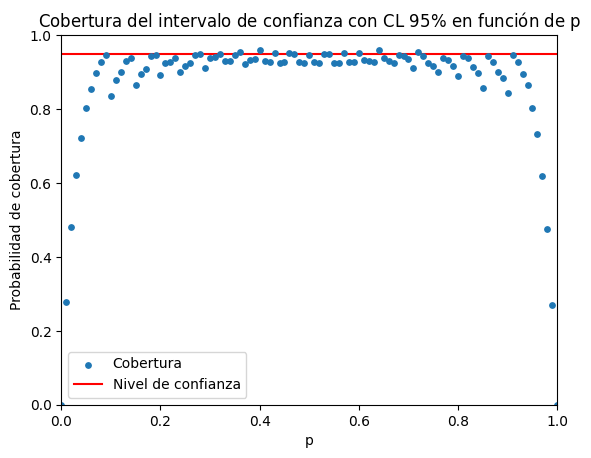

In [ ]:
# Graficamos la probabilidad de cobertura obtenida para cada p
plt.scatter(p_barrido, cobertura_proba_barrido, label='Cobertura', s=15, zorder=2)
plt.axhline(0.95, color='r', label='Nivel de confianza', zorder=1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('p')
plt.ylabel('Probabilidad de cobertura')
plt.title('Cobertura del intervalo de confianza con CL $95\%$ en función de p')
plt.legend()
plt.show()

In [ ]:
#estimamos la cobertura de un nuevo intervalo, agregando dos aciertos y dos fracasos

# Obtenemos el estimador de $t = (k + 2)/(n + 4)$ y el intervalo de confianza con CL 95%
estimador_t = (X+2) / (N_samples+4)
radio_intervalo = 1.96 * np.sqrt(estimador_t*(1-estimador_t)/N_samples)
intervalos_1 = estimador_t-radio_intervalo
intervalos_2 = estimador_t+radio_intervalo
# Estimamos la cobertura del intervalo utilizando danatools
cobertura_proba_2, cobertura_proba_2_error = danatools.get_coverage(intervalos_1, intervalos_2, p)
print(f'Probabilidad de cobertura: {cobertura_proba_2:.4f} \u00B1 {cobertura_proba_2_error:.4f}')

Probabilidad de cobertura: 0.9760 ± 0.0015


Podemos ver que la probabilidad de cobertura calculada (considerando su error) $0,9760 \pm 0,0015$ resulta incluyo mayor que el nivel de confianza (del $95 \%$), por lo que concluimos que el intervalo es exacto.

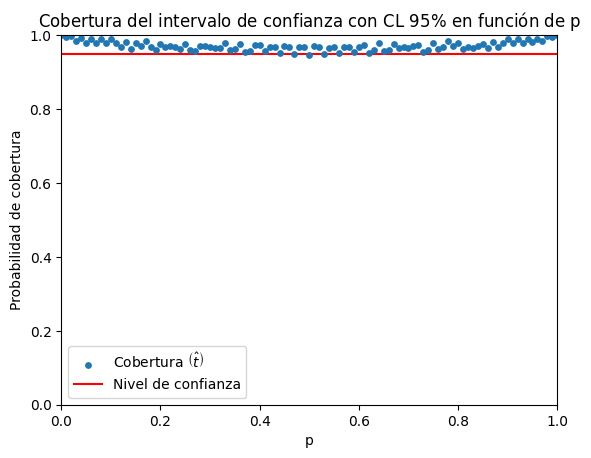

In [ ]:
# Repetimos el gráfico de cobertura en función de p para comprobar
# cómo varía con el nuevo estimador

estimador_p_barrido_t = (X_barrido + 2) / (N_samples + 4)
radios_intervalos_barrido_t = 1.96 * np.sqrt(estimador_p_barrido_t*(1-estimador_p_barrido_t)/N_samples)
intervalos_1_barrido_t = estimador_p_barrido_t - radios_intervalos_barrido_t
intervalos_2_barrido_t = estimador_p_barrido_t + radios_intervalos_barrido_t

cobertura_proba_barrido_t = np.zeros(len(p_barrido))
cobertura_proba_error_barrido_t = np.zeros(len(p_barrido))
for i, p_i in enumerate(p_barrido):
    cobertura_proba_t, cobertura_proba_error_t = danatools.get_coverage(intervalos_1_barrido_t[i], intervalos_2_barrido_t[i], p_i)
    cobertura_proba_barrido_t[i] = cobertura_proba_t
    cobertura_proba_error_barrido_t[i] = cobertura_proba_error_t

plt.scatter(p_barrido, cobertura_proba_barrido_t, label=r'Cobertura $ \left( \hat{t} \right) $', s=15, zorder=2)
plt.axhline(0.95, color='r', label='Nivel de confianza', zorder=1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('p')
plt.ylabel('Probabilidad de cobertura')
plt.title('Cobertura del intervalo de confianza con CL $95\%$ en función de p')
plt.legend()
plt.show()

En el gráfico también se puede comprobar que el intervalo es exacto con el estimador $t$.